In [1]:
import numpy as np

rng = np.random.Generator(np.random.MT19937(seed=12345))
n = 20
# _A and _C are internal - you don't need them.
_A = rng.standard_normal((2*n, n))
_C = np.diag(0.5*np.exp(rng.standard_normal((n,))))

Sigma = _C@_A.T@_A@_C
Sigma = 0.5*(Sigma + Sigma.T)
M = np.ones(n)*0.2
M = M.reshape((n,1))
sigma = np.sqrt(np.diag(Sigma))

# USE THE FOLLOWING CODE TO PLOT YOUR SOLUTION
# Replace x_max_divers and x_min_variance with your optimal values
# import matplotlib.pyplot as plt
# plt.bar(np.arange(0,20), x_max_divers, width=0.5, label="Max diversification")
# plt.bar((np.arange(0,20)*2+1)/2,   x_min_variance, width=0.5, label="Min variance")
# plt.legend()

In [2]:
Sigma.shape

(20, 20)

In [2]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

Y = cp.Variable((n,1))
K = cp.Variable(1)
objective = cp.Minimize(cp.quad_form(Y,Sigma))
constraints = [Y.T@sigma == np.ones((1,n)), Y >= 0, Y <= K*M, Y.T@np.ones((n,1)) == K]
problem = cp.Problem(objective, constraints)
result = problem.solve()
result



0.015196299032163392

In [4]:
print('xstar is:')
Y.value/K.value

xstar is:


array([[ 1.61442967e-01],
       [ 6.33404894e-03],
       [ 7.56749669e-03],
       [ 1.42368665e-02],
       [-2.47218764e-23],
       [ 2.50669561e-02],
       [ 4.36505902e-02],
       [ 3.44926390e-02],
       [ 5.48345805e-02],
       [ 5.23762883e-02],
       [ 1.19435437e-02],
       [ 1.92522745e-02],
       [ 2.13735383e-24],
       [ 6.77772557e-02],
       [ 8.69154551e-02],
       [ 4.11010175e-02],
       [ 8.92239359e-03],
       [ 5.50812555e-02],
       [ 1.09004371e-01],
       [ 2.00000000e-01]])

In [17]:
X = cp.Variable((n,1))
objective = cp.Minimize(cp.quad_form(X,Sigma))
constraints = [ X >= 0, X <= M, X.T@np.ones(n) == 1]
problem = cp.Problem(objective, constraints)
result = problem.solve()
result


0.07170611104541917

In [19]:
D = (sigma @ X.value) / (np.sqrt(X.value.T @ Sigma @ X.value))
D

array([[6.51872059]])

In [21]:
D = (sigma @ Y.value/K.value) / (np.sqrt((Y.value.T)/K.value @ Sigma @ (Y.value)/K.value))
D

array([[8.1120587]])

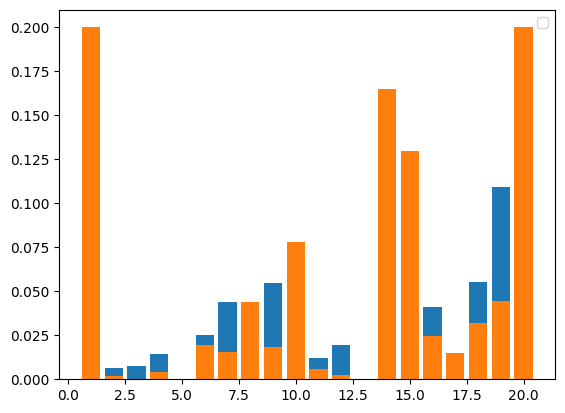

In [27]:
plt.bar(range(1, 21), (Y.value.reshape(n))/K.value)
plt.bar(range(1, 21), X.value.reshape(n))
plt.legend()
plt.show()